# Time Series Analysis

In this we are looking data of super store. We will do time series analysis on category "Technology". This will give us idea about how sales of technology category depends on previous values and on error terms. We will start with ADF model to look at stationarity then we will ACF and PACF to get MA and AR terms. We will decompose the data to look at seasonality component. Seasonality component will also be gauged by PACF and ACF. After that we will try few combinations of model to see which one can be used. We will use the one with lowest MAPE.

In the end will also use Auto ARIMA to come up with best model

## Getting Libraries

In [1]:
import os # working directory
import warnings # Ensure ignore /no warnings are displayed 
import itertools
import numpy as np # Data Processing
import matplotlib.pyplot as plt # Visualization
import pandas as pd # Data Processing 
import statsmodels.api as sm # Forecasting
import matplotlib
from pylab import rcParams # Setting up the chart elements/visualization
from statsmodels.tsa.stattools import adfuller # Stationarity
from numpy import log # Stationarity
from pmdarima.arima.utils import ndiffs # Stationarity/Differncing 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF and PACF Plots to determine the order of MA and AR components
from statsmodels.tsa.arima_model import ARIMA # Applying ARIMA
import pmdarima as pm # Applying ARIMA

## Setting up System

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Customization of the Plots created---------------->
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Getting Data

In [4]:
os.chdir(R'A:\Work\Course\Analytics\IVY Pro\Python\Part B Data Analysis\Time Series\Case 2')

In [5]:
os.getcwd()

'A:\\Work\\Course\\Analytics\\IVY Pro\\Python\\Part B Data Analysis\\Time Series\\Case 2'

In [6]:
df= pd.read_excel('Superstore.xls')

In [7]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Filtering Data to get technology category

In [8]:
Technology= df.loc[df['Category'] == 'Technology']

In [9]:
Technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


Lets look at minimum and maximum date range of this

In [11]:
print(Technology['Order Date'].min())

2014-01-06 00:00:00


In [13]:
print(Technology['Order Date'].max())

2017-12-30 00:00:00


So our time period is from '6th January 2014' to '30th December 2017'

## Preprocessing Data

In [21]:
Technology.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

So we can conclude there is no missing value

In [20]:
#If in case there is missing value lets say in sales and we want to use Moving Average (3 lags) for filling it


for index, value in Technology['Sales'].items():
    if np.isnan(value):
        Technology['Sales'].at[index] = Technology['Sales'].iloc[index-3: index].mean()

In [23]:
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()

In [24]:
Technology

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [25]:
Technology = Technology.set_index('Order Date') #Order date is being made as index

In [27]:
Technology

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [28]:
y = Technology['Sales'].resample('MS').mean() #Resampeling day sales data into monthly sales data

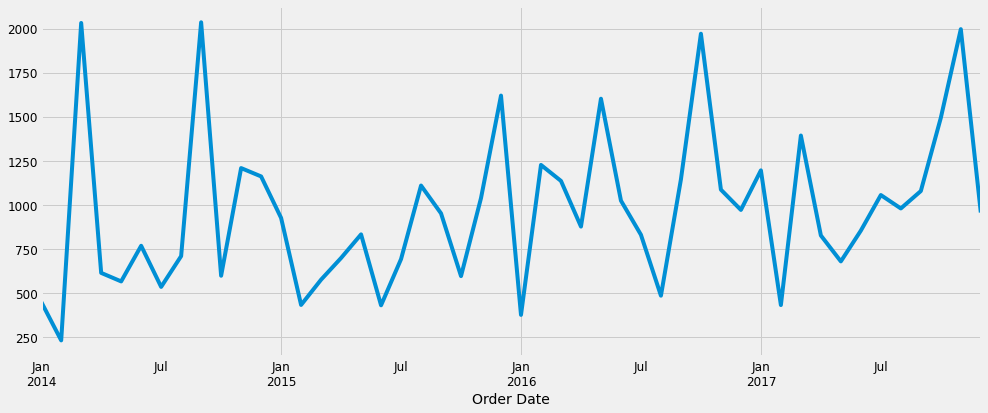

In [29]:
y.plot(figsize=(15,6))
plt.show()

## Decomposing Data

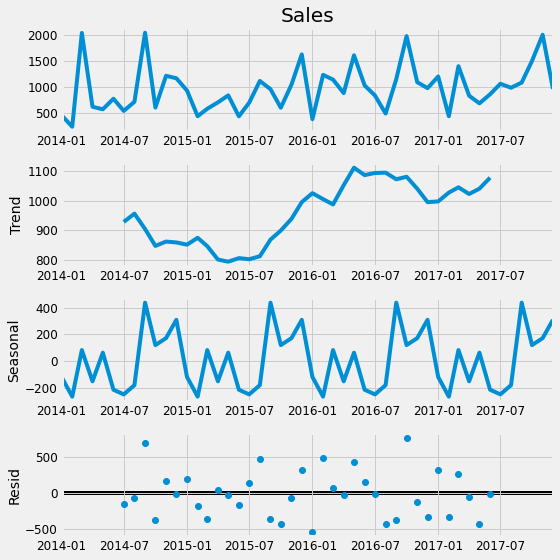

In [37]:
rcParams['figure.figsize'] = 8, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

**So we can see that there is seasonal component. It seems to be repeating after every year**

In [38]:
y_1 = y.reset_index()

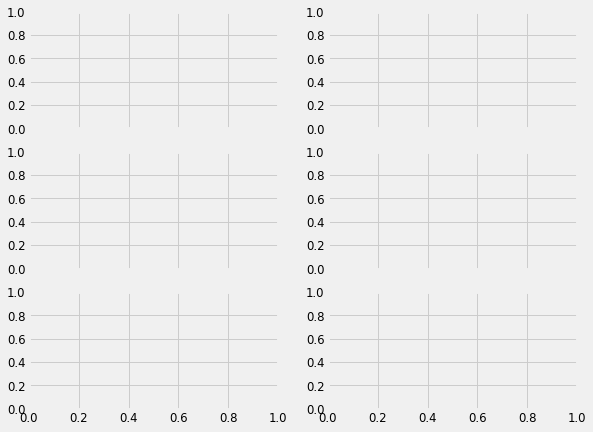

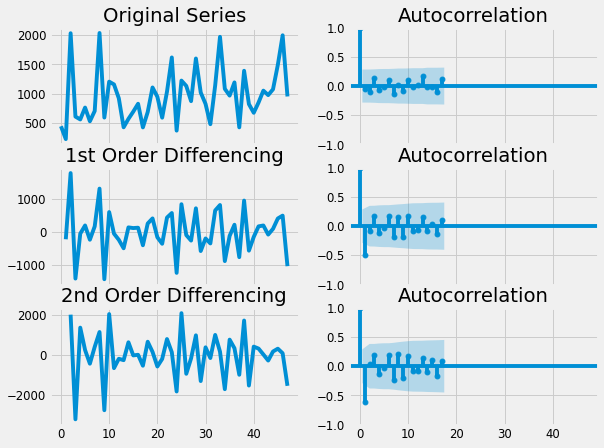

In [39]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':70})

fig, axes = plt.subplots(3, 2, sharex=True)

#Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y_1.Sales); axes[0, 0].set_title('Original Series')
plot_acf(y_1.Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_1.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_1.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_1.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

**So it seems that original series is non-stationary. However after 1st difference we can make it stationary**

We can also confirm it using ADF. 1st we will use ADF of original data to confirm it is non-stationary then we will test 1st differenced data.

In [61]:
ADF_Original = adfuller(y_1.Sales.dropna())
print('ADF Statistic: %f' % ADF_Original[0])
print('p-value: %f' % ADF_Original[1])

ADF Statistic: -7.187969
p-value: 0.000000


In [63]:
ADF_Differenced = adfuller(y_1.Sales.diff().dropna())
print('ADF Statistic: %f' % ADF_Differenced[0])
print('p-value: %f' % ADF_Differenced[1])


ADF Statistic: -10.123810
p-value: 0.000000


**It seems that original series itself if stationary. However there is some trend component. So for safe side lets take 1st differenced data**

### Getting order of MA and AR 

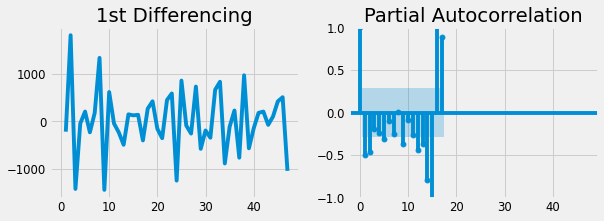

In [64]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':70})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_pacf(y_1.Sales.diff().dropna(), ax=axes[1])

plt.show()

For AR we will take order 0,1,2

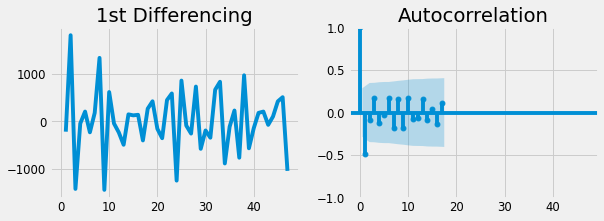

In [65]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1])

plt.show()

For MA we will take 0,1,2 as order

# Now lets look at model

## 1st Model - mod_0_1_0_12

In [72]:
mod_0_1_0_12 = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),#Non Seasonal Component
                                seasonal_order=(1, 1, 0, 12),#Seasonal Components AR=1, I=1, MA=0, Seasonality= 12 months.
                                #So by seasonal order we have 1 seasonal AR term but that comes at the lag of 12 months. 
                                #If we would have (2,1,0,12) Then we would have got AR at 12 months lag and 24 months lag
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod_0_1_0_12.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4325      0.203     -2.133      0.033      -0.830      -0.035
sigma2      6.476e+05   2.64e+05      2.455      0.014    1.31e+05    1.16e+06


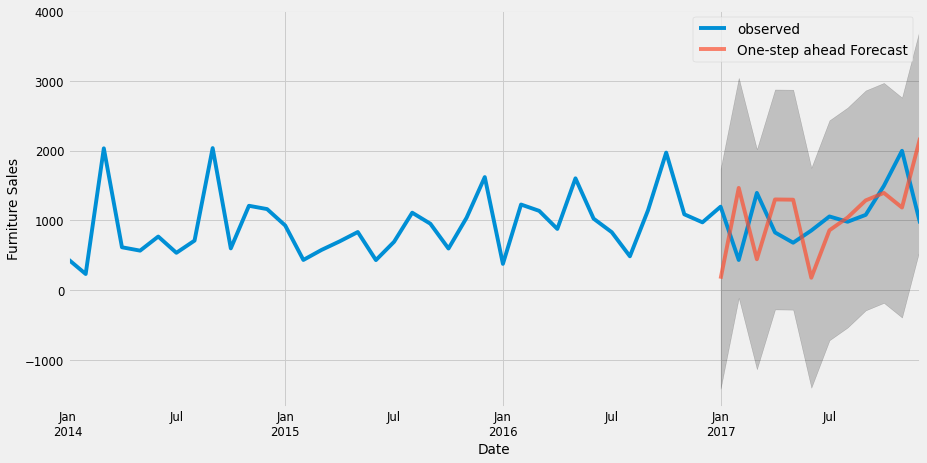

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

**So observed value and predicted value are both in confidence interval. However we need to look at MAPE to decide its accuracy**

In [74]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 530909.5
The Root Mean Squared Error of our forecasts is 728.64


In [75]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.7023722722227633,
 'me': -12.932917461014844,
 'mae': 616.2648703897704,
 'mpe': 0.20158299258931875,
 'rmse': 728.6353696214395,
 'corr': -0.1513066957209995,
 'minmax': 0.444462464468922}

**So its MAPE is 70%. Which is quite high. Lets use another model**

## 2nd Model - mod_1_1_0_12

In [76]:
mod_1_1_0_12 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),#Non Seasonal Component
                                seasonal_order=(1, 1, 0, 12),#Seasonal Components AR=1, I=1, MA=0, Seasonality= 12 months.
                                #So by seasonal order we have 1 seasonal AR term but that comes at the lag of 12 months. 
                                #If we would have (2,1,0,12) Then we would have got AR at 12 months lag and 24 months lag
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod_1_1_0_12.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5017      0.230     -2.178      0.029      -0.953      -0.050
ar.S.L12      -0.4501      0.236     -1.904      0.057      -0.913       0.013
sigma2      4.566e+05    1.5e+05      3.053      0.002    1.63e+05     7.5e+05


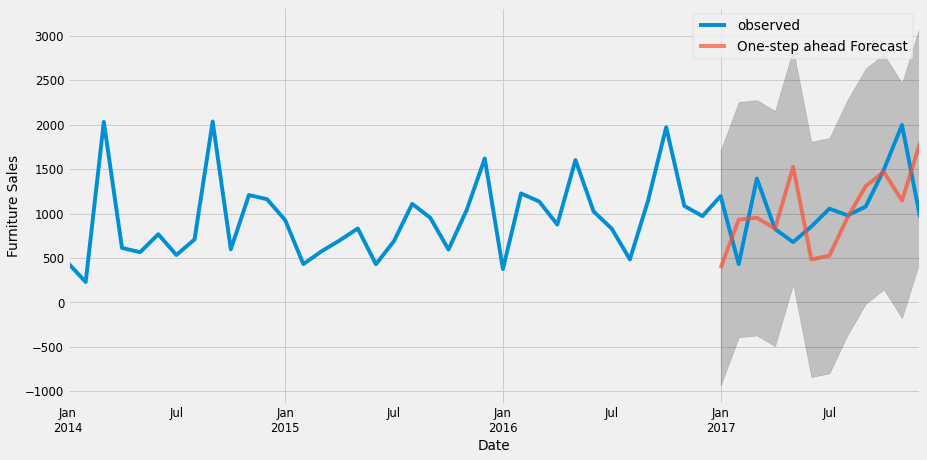

In [77]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [78]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 310162.9
The Root Mean Squared Error of our forecasts is 556.92


In [79]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.4921809812215728,
 'me': -51.5088610265611,
 'mae': 455.9057254467735,
 'mpe': 0.09356575259214313,
 'rmse': 556.9227016628107,
 'corr': 0.07640417669484158,
 'minmax': 0.344602636753802}

**So MAPE for [1,1,0,12] is better **

## 3rd Model - mod_1_1_1_12

In [80]:
mod_1_1_1_12 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),#Non Seasonal Component
                                seasonal_order=(1, 1, 0, 12),#Seasonal Components AR=1, I=1, MA=0, Seasonality= 12 months.
                                #So by seasonal order we have 1 seasonal AR term but that comes at the lag of 12 months. 
                                #If we would have (2,1,0,12) Then we would have got AR at 12 months lag and 24 months lag
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod_1_1_1_12.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


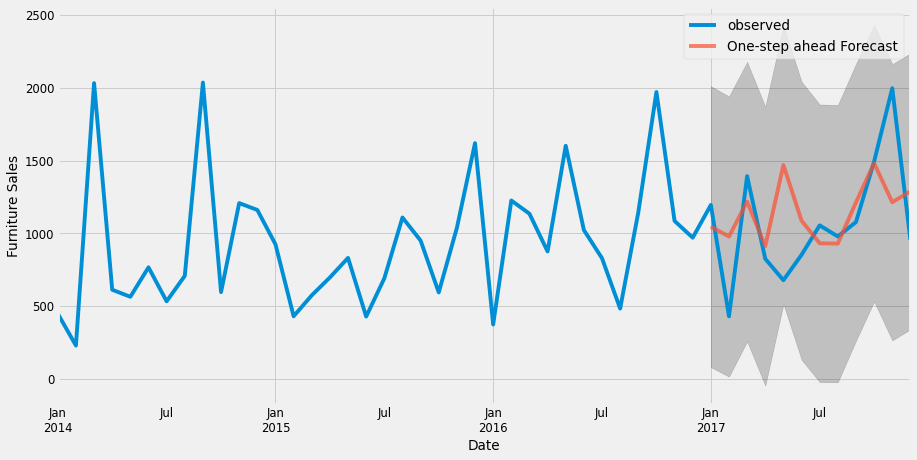

In [81]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [82]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 150095.64
The Root Mean Squared Error of our forecasts is 387.42


In [83]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.3424748268442476,
 'me': 69.90971401389339,
 'mae': 284.86867922142363,
 'mpe': 0.20642230917343954,
 'rmse': 387.4217869972733,
 'corr': 0.30273601758680796,
 'minmax': 0.21627410091551524}

**Now MAPE is even lower. So lets add more lag terms to see whethether we reduce the MAPE**

## 4th Model - mod_2_1_1_12 

In [84]:
mod_2_1_1_12 = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 1),#Non Seasonal Component
                                seasonal_order=(1, 1, 0, 12),#Seasonal Components AR=1, I=1, MA=0, Seasonality= 12 months.
                                #So by seasonal order we have 1 seasonal AR term but that comes at the lag of 12 months. 
                                #If we would have (2,1,0,12) Then we would have got AR at 12 months lag and 24 months lag
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod_2_1_1_12.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3690      0.225     -1.642      0.101      -0.809       0.071
ar.L2         -0.4579      0.268     -1.708      0.088      -0.983       0.068
ma.L1         -1.0000      0.396     -2.525      0.012      -1.776      -0.224
ar.S.L12      -0.6790      0.165     -4.115      0.000      -1.002      -0.356
sigma2      1.798e+05    2.2e-06   8.16e+10      0.000     1.8e+05     1.8e+05


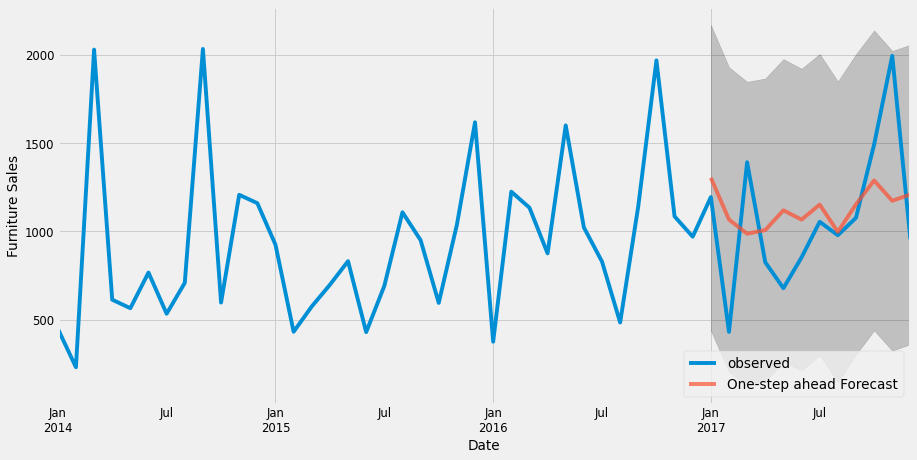

In [85]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [86]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 137963.91
The Root Mean Squared Error of our forecasts is 371.43


In [87]:
forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.33202832627075524,
 'me': 50.13099480814716,
 'mae': 288.7519455344452,
 'mpe': 0.19212080562767198,
 'rmse': 371.4349282299787,
 'corr': 0.36134649992704804,
 'minmax': 0.2230820134303273}

**So MAPE is lower but not much**

## 5th Model - mod_2_1_2_12

In [88]:
mod_2_1_2_12 = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 2),#Non Seasonal Component
                                seasonal_order=(1, 1, 0, 12),#Seasonal Components AR=1, I=1, MA=0, Seasonality= 12 months.
                                #So by seasonal order we have 1 seasonal AR term but that comes at the lag of 12 months. 
                                #If we would have (2,1,0,12) Then we would have got AR at 12 months lag and 24 months lag
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod_2_1_2_12.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8309      0.369     -2.254      0.024      -1.553      -0.108
ar.L2         -0.4847      0.201     -2.416      0.016      -0.878      -0.091
ma.L1         -0.3923      0.507     -0.774      0.439      -1.386       0.601
ma.L2         -0.6076      0.432     -1.408      0.159      -1.454       0.238
ar.S.L12      -0.6106      0.201     -3.033      0.002      -1.005      -0.216
sigma2      1.771e+05   3.23e-06   5.48e+10      0.000    1.77e+05    1.77e+05


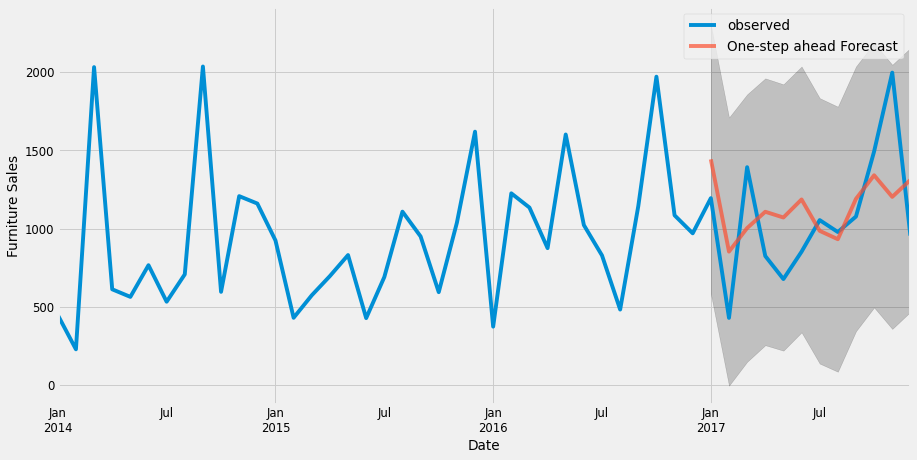

In [89]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [90]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 128034.86
The Root Mean Squared Error of our forecasts is 357.82


In [91]:
forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.322611987771998,
 'me': 58.39552109604224,
 'mae': 299.86780123125584,
 'mpe': 0.17423124716398328,
 'rmse': 357.8195917650749,
 'corr': 0.4368716710970534,
 'minmax': 0.23560212352133503}

**So here MAPE is lower but not by that much**

# Auto Arima

In [93]:
from pmdarima.arima import auto_arima

auto_mod = auto_arima(y,start_p=0,start_q=0,max_p=6,max_q=6,start_P=0,
                      start_Q=0,max_P=6,max_Q=6,m=12,seasonal =True, trace = True,n_fits=10,stepwise=True)


auto_mod.summary()
Prediction_Auto_Arima = pd.DataFrame(auto_mod.predict(n_periods =12))
y_truth_df = y_truth.reset_index(drop=True)
Prediction_Auto_Arima=pd.concat([Prediction_Auto_Arima,y_truth_df],axis=1)
mape_auto_arima = np.mean(np.abs(Prediction_Auto_Arima.iloc[:,0] - Prediction_Auto_Arima.iloc[:,1])/np.abs(Prediction_Auto_Arima.iloc[:,0]))  # MAPE
print('mape from Auto - Arima-->' + str(float(mape_auto_arima)))

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=725.877, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=729.717, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=729.615, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=807.454, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.873, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=727.843, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=729.843, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=727.740, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=727.697, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=729.641, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.812 seconds
mape from Auto - Arima-->0.30239905212816093


In [94]:
auto_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -360.939
Date:                Sun, 07 Aug 2022   AIC                            725.877
Time:                        14:54:20   BIC                            729.620
Sample:                             0   HQIC                           727.291
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    967.6149     77.667     12.458      0.000     815.390    1119.840
sigma2       1.99e+05   4.64e+04      4.292      0.000    1.08e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.70   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.84
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**So best model is one with just intercept term. No lag term no seasonality**

**However it doesnt make sense to not take any term so in our all the tried models we found out that model 5th has lowest MAPE so lets use that**

**Hence Equation: St = -0.8309*S(t-1) -0.4847*S(t-2) -0.3923*E(t-1) -0.6076*E(t-2) -0.6106*S(t-12) + U**

Si: Sales of i_th period
Ei: Error term of i_th period
U: White Noise